# Series Temporales

Las series temporales son muestras de valores tomadas a lo largo de un tiempo con un muestro generalmente equidistante. Por ejemplo, registros climatológicos, comprobaciones de seguridad, etc.

Pandas gestiona las series temporales usando el indice: un índice que es un fecha (datetime)

El indice de un dataframe es el pilar básico de acceso a los valores, por lo cual es más eficiente filtrar, seleccionar, interpolar, ...

Nuestros anteriores dataframes tenian un índice númerico. Ahora trabajaremos con índices de tiempo.

Documentación: <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/timeseries.html">TimeSeries</a>


### Ejercicio : Prepara el entorno de trabajo con las librerias necesarias

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Ejercicio 1: Abre el archivo 'climaMallorca.csv'.

In [2]:
df = pd.read_csv('climaMallorca.csv')

In [4]:
df.head()

,Unnamed: 0,idDate,wind,temperature_mean
0,0,2015/11/28,4.0,12.0
1,1,2015/11/29,3.0,12.0
2,2,2012/06/19,10.0,27.0
3,3,2015/11/20,6.0,14.0
4,4,2015/11/21,22.0,15.0


### Ejercicio 2: Elimina la columna sin nombre

In [8]:
df = df.drop(['Unnamed: 0'], axis=1)

df.head()

,idDate,wind,temperature_mean
0,2015/11/28,4.0,12.0
1,2015/11/29,3.0,12.0
2,2012/06/19,10.0,27.0
3,2015/11/20,6.0,14.0
4,2015/11/21,22.0,15.0


### Ejercicio 3: Haz una evaluación rápida de los datos

In [9]:
df.describe()

,wind,temperature_mean
count,2801.000000,2801.000000
mean,8.111746,17.298108
std,4.975943,8.193379
min,0.000000,2.000000
25%,5.000000,12.000000
50%,7.000000,16.000000
75%,10.000000,22.000000
max,43.000000,82.000000


In [10]:
df.dtypes

idDate               object
wind                float64
temperature_mean    float64
dtype: object

### Ejercicio 4: Grafica las distribuciones de la velocidad del viento y de la temperatura

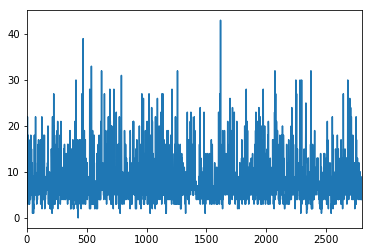

In [11]:
df['wind'].plot()

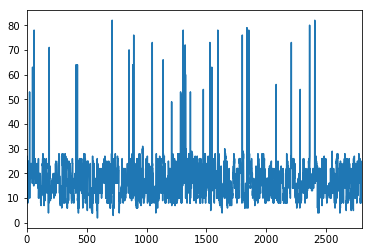

In [12]:
df['temperature_mean'].plot()

#### Pregunta: Hay algo raro?

Responde aquí

### Ejercicio 5: Calcula la media de la velocidad del viento del año 2015 (pregunta trampa)

In [18]:
df[df['idDate'].str.contains('2015')]['wind'].mean()

7.586301369863014

# pd.to_datetime()
## nuestro aliado con las fechas en pandas

Al trabajar con fechas, debemos comprobar el tipo de dato en que están y usar el que más nos convenga, normalmente un Datetime.

Pandas nos ofrece, cómo siempre, una solución de alto nivel para convertir cadenas de caracteres a formato fecha.

Además, al utilizar la fecha como índice, podremos usar funciones específicas para agrupar por diferentes intervalos de tiempo.

### Ejercicio 6: Aplica la función pd.to_datetime() para convertir la columna idDate a formato fecha

In [19]:
df['idDate'] = pd.to_datetime(df['idDate'])

In [20]:
df['idDate'].dtype

dtype('<M8[ns]')

### Ejercicio 7: Asigna la columna idDate en formato fecha al indice del dataframe

In [23]:
df = df.set_index(df['idDate'])

In [26]:
df = df.drop('idDate', axis=1)

In [28]:
df.head()

,wind,temperature_mean
idDate,,
2015-11-28,4.0,12.0
2015-11-29,3.0,12.0
2012-06-19,10.0,27.0
2015-11-20,6.0,14.0
2015-11-21,22.0,15.0


### Tip

Al tener la fecha en el indice, podemos consultar las fechas de forma mucho más facil.
Por ejemplo, para filtrar por el año 2015, podríamos filtrar simplemente usando `df.loc['2015']`

Echa un vistazo a la ISO 8601: https://es.wikipedia.org/wiki/ISO_8601

### Ejercicio 8:  Calcula la velocidad media del viento del año 2015

In [36]:
df = df.sort_index()

In [40]:
df.loc['2015']['wind'].mean()

7.586301369863014

### Ejercicio 9:  Calcula la media de la velocidad media del viento del año 2015 y el mes agosto

In [43]:
df.loc['2015-08-20']['wind']

5.0

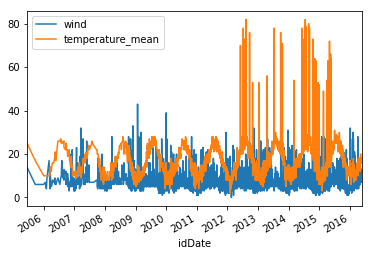

In [44]:
df.plot()

### Tip

Además de poder filtrar facilmente usando strings, podemos agrupar utilizando la función de pandas:

pd.TimeGrouper()

Esta función nos permite agregar por:

* 'S': segundo
* 'T': minuto
* 'H': hora
* 'W': semana
* 'M': mes
* 'A': año
* 'Q': cutrimestre

### Ejercicio 10: Ordena los datos en función del indice

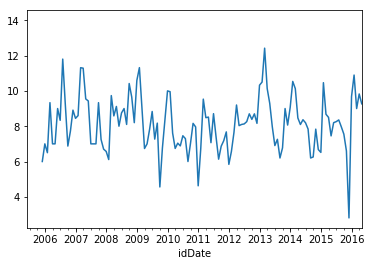

In [46]:
df['wind'].groupby(pd.TimeGrouper('M')).mean().plot()

### Ejercicio 11: Haz un gráfico de la evolución de la temperatura media mensual desde el año 2015

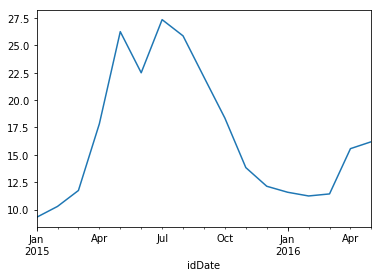

In [50]:
df.loc['2015':]['temperature_mean'].groupby(pd.TimeGrouper('M')).mean().plot()

### Tip

Al ser un tipo fecha, podemos acceder a sis propiedades, es decir: año, mes, dia, hora...

Aquí todas:
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components


### Ejercicio 12: Cuantos años distintos hay en el indice?

In [55]:
df.index.day


Int64Index([14, 21, 31, 19,  1,  8,  5, 16, 17, 18,
            ...
             7,  9, 10, 11, 12, 17, 18, 19, 20, 23],
           dtype='int64', name='idDate', length=2801)